In [1]:
import numpy as np
import xarray as xr

In [2]:
mineralFilePath = 'EMIT_L2B_MIN_001_20220811T001233_2222216_001.nc'
reflectanceFilePath = 'EMIT_L2A_RFL_001_20220811T001233_2222216_001.nc'

In [3]:
refl = xr.open_dataset(reflectanceFilePath)

In [4]:
cropDowntrack = int(refl.dims['downtrack']/1)
cropCrosstrack = int(refl.dims['crosstrack']/1)

In [5]:
refl = refl.sel(downtrack=slice(0, cropDowntrack), crosstrack=slice(0, cropCrosstrack))

In [6]:
hsiData = refl['reflectance'].values
hsiData.shape

(1280, 1242, 285)

In [7]:
minerals = xr.open_dataset(mineralFilePath)
minerals = minerals.sel(downtrack=slice(0, cropDowntrack), crosstrack=slice(0, cropCrosstrack))

In [8]:
groundTruth = minerals.group_1_mineral_id.values
groundTruth.shape

(1280, 1242)

In [9]:
np.isnan(np.sum(hsiData))

False

In [10]:
print(hsiData.shape)
print(groundTruth.shape)

(1280, 1242, 285)
(1280, 1242)


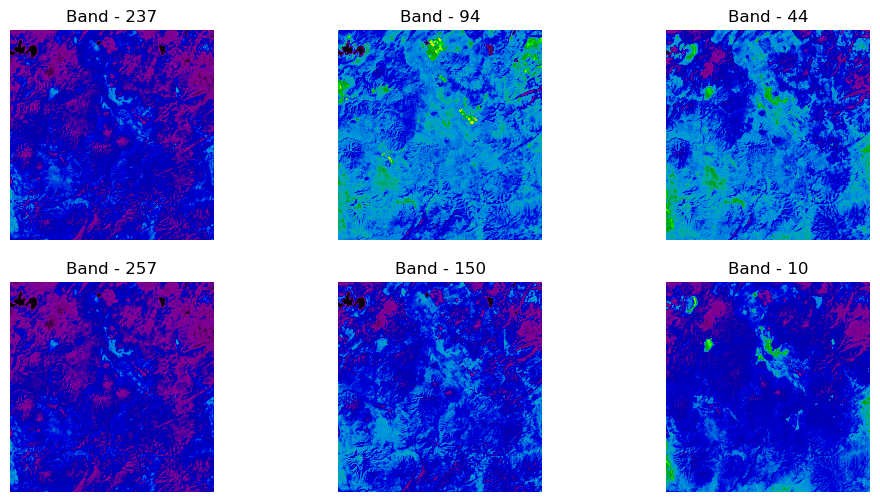

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(hsiData.shape[2])
    plt.imshow(hsiData[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')

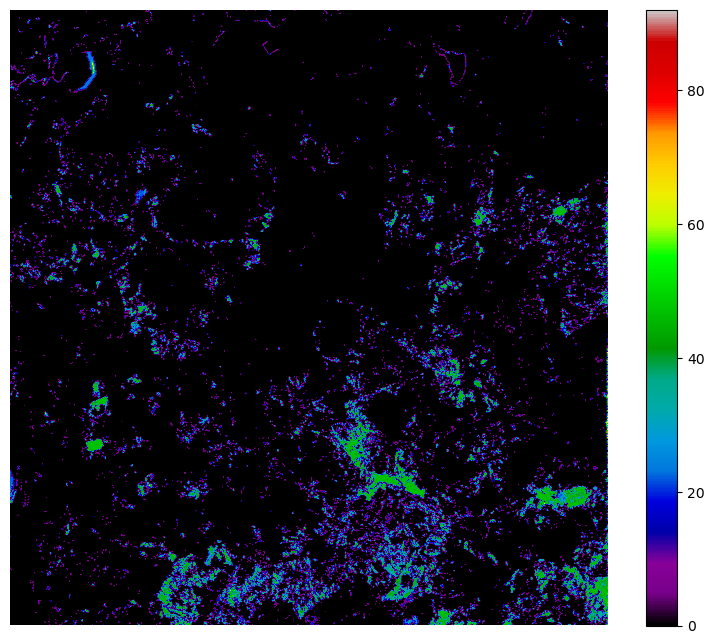

In [12]:
plt.figure(figsize=(10, 8))
plt.imshow(groundTruth, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()

In [13]:
X = hsiData.reshape(-1, hsiData.shape[2])
y = groundTruth.ravel()

In [14]:
import pandas as pd

X = pd.DataFrame(X)
X['gt'] = y
X.head()

,0,1,2,3,4,5,6,7,8,9,...,276,277,278,279,280,281,282,283,284,gt
0,0.010281,0.010403,0.010525,0.010649,0.010932,0.011388,0.011972,0.012628,0.013215,0.013814,...,0.021460,0.021286,0.021945,0.021045,0.020107,0.018974,0.019383,0.018503,0.017791,0.0
1,0.011180,0.011382,0.011583,0.011786,0.012148,0.012683,0.013340,0.014069,0.014724,0.015389,...,0.026586,0.025946,0.026113,0.025691,0.024153,0.024572,0.023118,0.022323,0.021669,0.0
2,0.012435,0.012749,0.013063,0.013379,0.013852,0.014502,0.015266,0.016096,0.016839,0.017584,...,0.032494,0.029946,0.029996,0.027479,0.028405,0.026994,0.026503,0.025581,0.024835,0.0
3,0.017038,0.017625,0.018211,0.018801,0.019578,0.020565,0.021674,0.022856,0.023913,0.024962,...,0.051407,0.048852,0.048247,0.044599,0.044867,0.044043,0.041095,0.039858,0.039054,0.0
4,0.017849,0.018292,0.018735,0.019183,0.019864,0.020798,0.021901,0.023103,0.024190,0.025284,...,0.051231,0.049668,0.051017,0.044889,0.045879,0.043703,0.040889,0.039307,0.039314,0.0


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589760 entries, 0 to 1589759
Columns: 286 entries, 0 to gt
dtypes: float32(286)
memory usage: 1.7 GB


In [16]:
X.isnull().values.any()

False

In [17]:
X = X.loc[:, ~(X == -0.01).any()]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589760 entries, 0 to 1589759
Columns: 245 entries, 0 to gt
dtypes: float32(245)
memory usage: 1.5 GB


In [18]:
X.shape

(1589760, 245)

In [19]:
X = X.query('gt != 0')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83370 entries, 273 to 1589759
Columns: 245 entries, 0 to gt
dtypes: float32(245)
memory usage: 78.6 MB


In [20]:
X = X[X['gt'].map(X['gt'].value_counts()) > 2]

In [21]:
y = X.pop('gt').values
y

array([47., 47., 15., ..., 47., 47., 47.], dtype=float32)

In [22]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({47.0: 66921, 32.0: 4056, 45.0: 3960, 20.0: 2508, 23.0: 946, 22.0: 861, 21.0: 824, 41.0: 655, 25.0: 425, 64.0: 302, 87.0: 193, 8.0: 174, 77.0: 130, 43.0: 121, 40.0: 116, 4.0: 107, 42.0: 100, 56.0: 88, 51.0: 80, 36.0: 79, 67.0: 75, 76.0: 68, 78.0: 68, 31.0: 66, 10.0: 56, 28.0: 51, 82.0: 48, 85.0: 44, 60.0: 31, 2.0: 23, 15.0: 22, 17.0: 21, 7.0: 18, 50.0: 13, 6.0: 13, 30.0: 13, 89.0: 12, 49.0: 9, 19.0: 9, 5.0: 8, 34.0: 6, 33.0: 6, 92.0: 6, 57.0: 5, 14.0: 5, 44.0: 5, 29.0: 5, 9.0: 4, 48.0: 4})


In [23]:
len(counter)

49

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 10)

# principalComponents = pca.fit_transform(X)

# X = principalComponents

# ev=pca.explained_variance_ratio_

# plt.figure(figsize=(12, 6))
# plt.plot(np.cumsum(ev))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')


# plt.show()

In [26]:
from sklearn.svm import SVC

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)
print(X_train.shape)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_test, pred)}n")

(8336, 244)


In [28]:
def class_weight(labels_dict,mu=0.15):
	total = np.sum(np.fromiter(labels_dict.values(), dtype=int))
	keys = labels_dict.keys()
	weight = dict()
	for i in keys:
		score = np.log(mu*total/int(labels_dict[i]))
		weight[i] = score if score > 1 else 1
	return weight

In [29]:
weights = class_weight(Counter(y))

In [30]:
# model = SVC(C=100, gamma=1, kernel='linear', class_weight = weights)
# model.fit(X_train, y_train)
# print_score(model, X_train, y_train, X_test, y_test, train=False)

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(class_weight = weights), param_grid, refit=True, verbose=1, cv=3, n_jobs=- 1)

grid.fit(X_train, y_train) 

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(class_weight = weights, **best_params)
svm_clf.fit(X_train, y_train)

# print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


c:\Users\jarbe\anaconda3\envs\emit\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best params: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Test Result:n================================================
Accuracy Score: 93.45%
_______________________________________________
CLASSIFICATION REPORT:n                 2.0        4.0       5.0        6.0        7.0         8.0  \
precision   0.321429   0.430556  0.200000   0.210526   0.194444    0.345679   
recall      0.428571   0.645833  0.142857   0.333333   0.437500    0.178344   
f1-score    0.367347   0.516667  0.166667   0.258065   0.269231    0.235294   
support    21.000000  96.000000  7.000000  12.000000  16.000000  157.000000   

           9.0       10.0      14.0   15.0  ...        77.0       78.0  \
precision  0.0   0.493506  0.086957   0.15  ...    0.657143   1.000000   
recall     0.0   0.760000  0.500000   0.30  ...    0.589744   0.983607   
f1-score   0.0   0.598425  0.148148   0.20  ...    0.621622   0.991736   
support    4.0  50.000000  4.000000  20.00  ...  117.000000  61.000000   

                82.0  

c:\Users\jarbe\anaconda3\envs\emit\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jarbe\anaconda3\envs\emit\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jarbe\anaconda3\envs\emit\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# import joblib
# joblib.dump(model, 'svm_91acc_half_class-weights.pkl')

In [33]:
accuracy = 0

for i in range(0, 10):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i, stratify=y)
    svm_clf = SVC(class_weight = weights, **best_params)
    svm_clf.fit(X_train, y_train)
    pred = svm_clf.predict(X_test)
    acc = accuracy_score(y_test, pred) * 100
    print(acc)
    accuracy += acc
accuracy = accuracy / 10
print(accuracy)

0
94.89923224568139
1
94.97840690978887
2
94.98560460652591
3
95.01439539347409
4
95.1031669865643
5
95.09836852207295
6
94.86564299424184
7
95.01439539347409
8
95.0911708253359
9
95.00239923224568
95.0052783109405


In [91]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import cross_val_score

# def evaluate_model(X, y, model):
#  # define evaluation procedure
#  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
#  # evaluate model
#  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#  return scores

In [ ]:
# # evaluate the model
# scores = evaluate_model(X, y, svm_clf)
# # summarize performance
# print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
y_hat = svm_clf.predict(X_test)
clf_report = classification_report(y_test,
                                   y_hat,
                                   output_dict=True)

<Axes: >

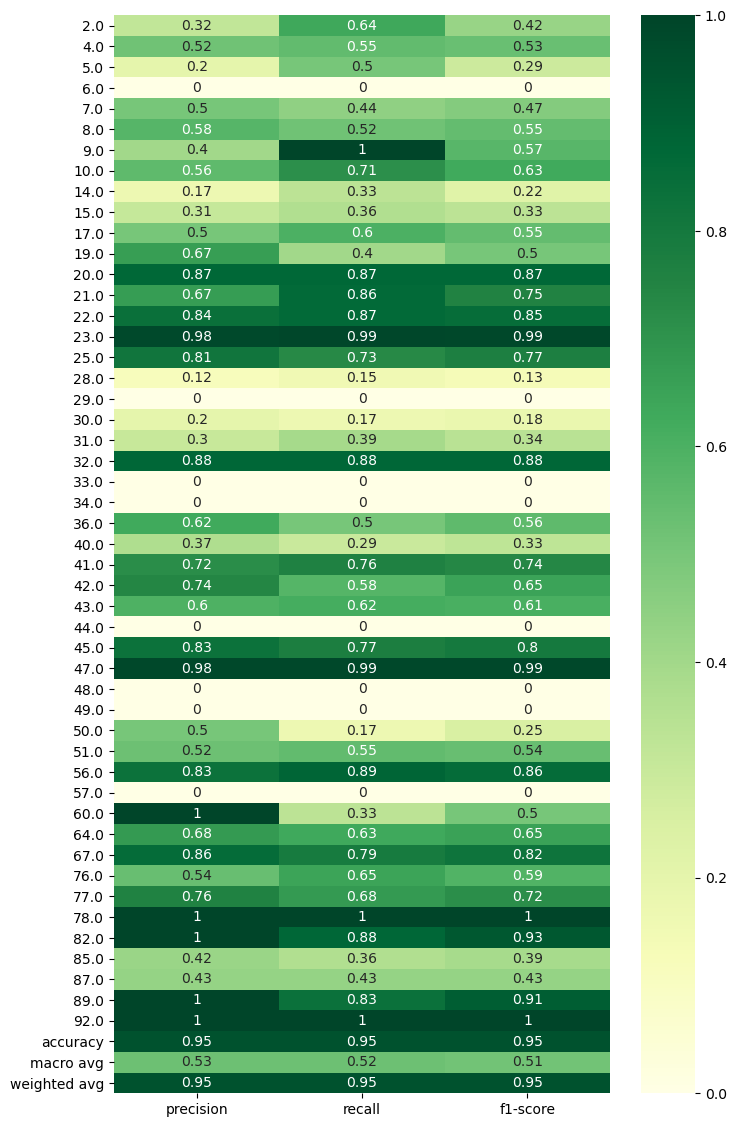

In [85]:
# .iloc[:-1, :] to exclude support
plt.figure(figsize=(8, 14))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="YlGn")

In [42]:
# from sklearn.metrics import ConfusionMatrixDisplay
# cm = confusion_matrix(y_test, y_hat, labels=svm_clf.classes_)

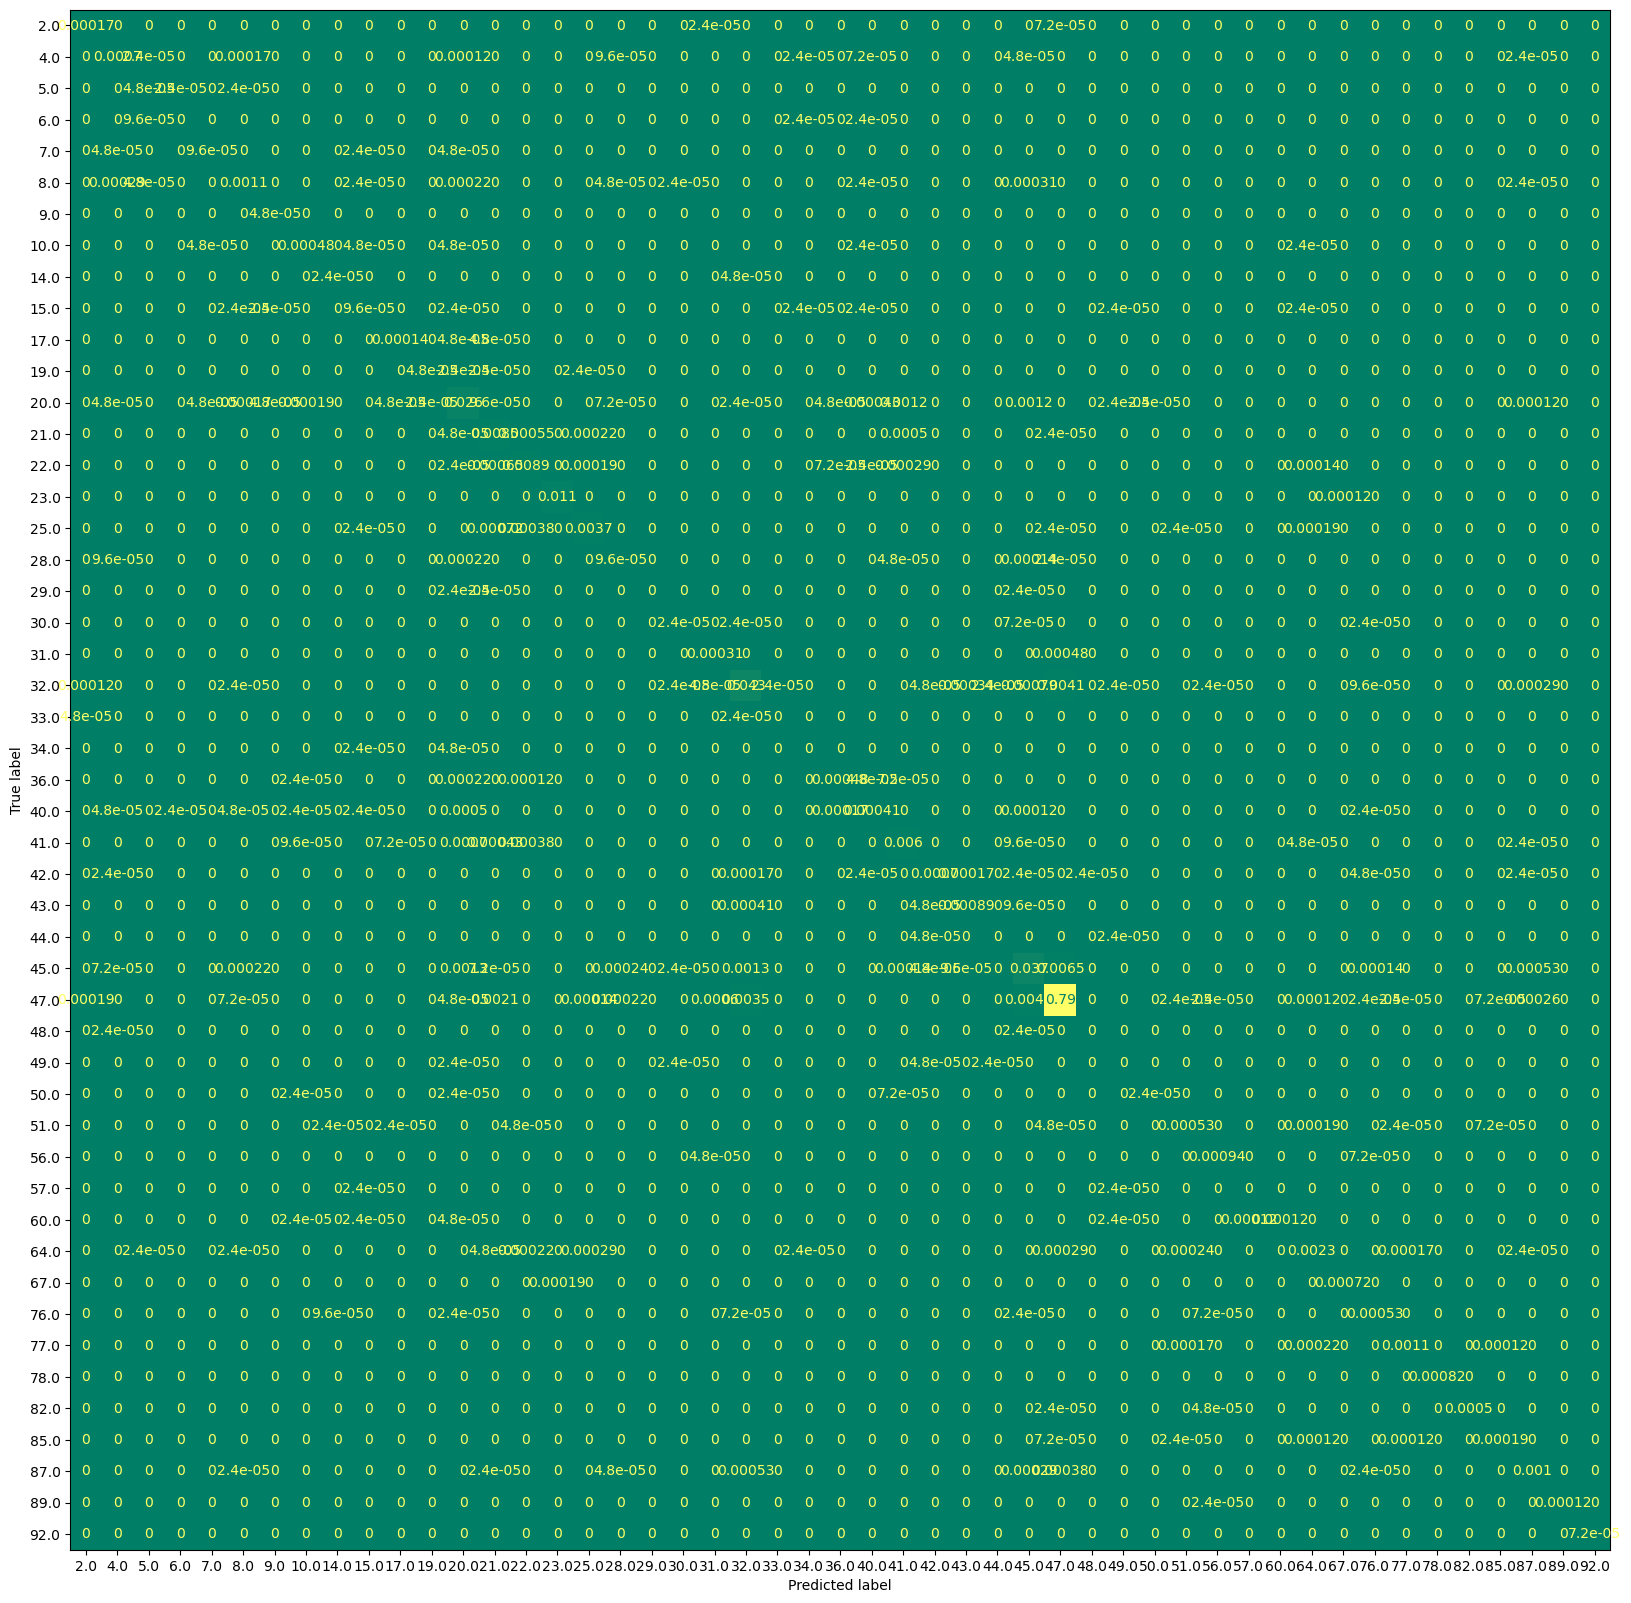

In [69]:
# fig, ax = plt.subplots(figsize=(20,20))
# cmp = ConfusionMatrixDisplay.from_predictions(y_test, y_hat, colorbar=False, ax=ax, normalize='all', cmap="summer")